## PHÂN TÍCH DỮ LIỆU VỀ MÔI TRƯỜNG NƯỚC BIỂN (Vùng bờ Quần đảo Cát Bà năm 2023)						

### BƯỚC 1: Import các thư viện cần thiết

**1.1. Import thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**1.2. Chỉnh sửa cấu hình hiển thị**

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)
# Hiển thị tất cả các dòng
pd.set_option('display.max_rows', None)
# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

### BƯỚC 2: Đọc và làm sạch dữ liệu

**2.1. Thông tin tổng quan về dữ liệu**

In [3]:
# Kiểm tra dữ liệu ban đầu
df_raw = pd.read_csv('Dữ liệu về môi trường nước biển Cát bà.xlsx - Sheet1.csv')

print("=== THÔNG TIN DỮ LIỆU BAN ĐẦU ===")
print(f"Kích thước: {df_raw.shape}")
print(f"Số cột: {len(df_raw.columns)}")
print("\n10 dòng đầu của 10 cột đầu tiên:")
print(df_raw.iloc[:10, :10])

=== THÔNG TIN DỮ LIỆU BAN ĐẦU ===
Kích thước: (57, 39)
Số cột: 39

10 dòng đầu của 10 cột đầu tiên:
  DỮ LIỆU VỀ MÔI TRƯỜNG NƯỚC BIỂN (Vùng bờ Quần đảo Cát Bà năm 2023)  \
0  (Nguồn: TT quan trắc tài nguyên và môi trường ...                   
1                                                NaN                   
2                                                STT                   
3                                                NaN                   
4                                                  1                   
5                                                  2                   
6                                                  3                   
7                                                  4                   
8                                                  5                   
9                                                  6                   

           Unnamed: 1 Unnamed: 2    Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 NaN        NaN   

**2.2. Lấy dữ liệu chính**

In [4]:
# Lấy dữ liệu từ dòng 3 đến dòng 32 (27 thông số), chỉ lấy 7 cột đầu
df = df_raw.iloc[3:31, :7].copy()

**2.3. Chuyển đổi định dạng kiểu dữ liệu**

In [5]:
# Đặt tên cột
df.columns = ['STT', 'Thông số', 'Đơn vị', 'Tháng 2', 'Tháng 5', 'Tháng 8', 'Tháng 11']

# Chuyển đổi kiểu dữ liệu
df['STT'] = pd.to_numeric(df['STT'], errors='coerce')

months = ['Tháng 2', 'Tháng 5', 'Tháng 8', 'Tháng 11']
for c in months:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Loại bỏ các dòng có giá trị NaN ở cột STT
df = df.dropna(subset=['STT'])
df = df.reset_index(drop=True)

print("\n=== DỮ LIỆU SAU KHI LÀM SẠCH ===")
print(f"Kích thước: {df.shape}")
print("\nDữ liệu:")
print(df)


=== DỮ LIỆU SAU KHI LÀM SẠCH ===
Kích thước: (27, 7)

Dữ liệu:
     STT            Thông số      Đơn vị    Tháng 2   Tháng 5   Tháng 8  \
0    1.0    Ôxy hoà tan (DO)        mg/l    4.50000    4.8000    5.2000   
1    2.0  Nhiệt độ nước biển          0C   20.30000   30.2000   28.5000   
2    3.0                  pH         NaN    8.03000    8.4500    8.2600   
3    4.0              Độ mặn          %o   28.00000   31.2000   27.5000   
4    5.0             Độ kiềm        mg/l   64.00000   67.0000   66.4000   
5    6.0            Độ trong          cm  250.00000  430.0000  410.0000   
6    7.0                 NH3        mg/l    0.02600    0.0270    0.0310   
7    8.0                 H2S        mg/l    0.01800    0.0190    0.0220   
8    9.0  Nhiệt độ không khí          oC   20.00000   28.5000   28.6000   
9   10.0           Lượng mưa    mm/tháng   26.00000  162.5000  305.4000   
10  11.0          BOD5(200C)        mg/l    4.00000    4.2100    4.6600   
11  12.0                 COD        

**2.4. Chuyển đổi định dạng DataFrame về wide format**

Các hàng tương đương với các tháng, các cột tương đương với các thông số

In [7]:
df_long = pd.melt(df,
                  id_vars=['STT', 'Thông số', 'Đơn vị'],
                  value_vars=months,
                  var_name='Tháng',
                  value_name='Giá trị')

# Chuẩn hóa tên tháng thành số
df_long['Tháng'] = df_long['Tháng'].str.replace('Tháng ', '').astype(int)

print("Dữ liệu dạng long format:")
print("Kích thước dữ liệu:", df_long.shape)
display(df_long.head())

# Pivot: index = Tháng, columns = Thông số, values = Giá trị
df_wide = df_long.pivot_table(index='Tháng', columns='Thông số', values='Giá trị')

# Sắp xếp index tháng theo thứ tự tự nhiên [2,5,8,11]
df_wide = df_wide.reindex(sorted(df_wide.index, key=lambda x: [2,5,8,11].index(x)))

print("Dữ liệu dạng wide format:")
print("Kích thước dữ liệu:", df_wide.shape)
df_wide.head(10)

Dữ liệu dạng long format:
Kích thước dữ liệu: (108, 5)


,STT,Thông số,Đơn vị,Tháng,Giá trị
0,1.0,Ôxy hoà tan (DO),mg/l,2,4.50
1,2.0,Nhiệt độ nước biển,0C,2,20.30
2,3.0,pH,NaN,2,8.03
3,4.0,Độ mặn,%o,2,28.00
4,5.0,Độ kiềm,mg/l,2,64.00


Dữ liệu dạng wide format:
Kích thước dữ liệu: (4, 27)


Thông số,Asen (As),BOD5(200C),CN-,COD,Cadimi (Cd),Chì (Pb),Coliform,Crom VI (Cr6+),Cu,Florua (F-),H2S,Hg,Lượng mưa,Mangan (Mn),NH3,Nhiệt độ không khí,Nhiệt độ nước biển,Sắt (Fe),TSS,Tổng Crom,Tổng dầu mỡ khoáng,Zn,pH,Ôxy hoà tan (DO),Độ kiềm,Độ mặn,Độ trong
Tháng,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.034,4.00,0.0022,1.70,0.0040,0.0055,410.0,0.0226,0.0784,1.45,0.018,0.00321,26.0,0.852,0.026,20.0,20.3,0.0146,5.6,0.163,0.024,0.622,8.03,4.5,64.0,28.0,250.0
5,0.038,4.21,0.0019,1.74,0.0051,0.0080,450.0,0.0240,0.0070,1.45,0.019,0.00350,162.5,0.810,0.027,28.5,30.2,0.0280,18.3,0.190,0.036,0.550,8.45,4.8,67.0,31.2,430.0
8,0.037,4.66,0.0018,1.67,0.0062,0.0090,523.0,0.0260,0.0066,1.45,0.022,0.00450,305.4,0.840,0.031,28.6,28.5,0.0300,10.8,0.018,0.360,0.580,8.26,5.2,66.4,27.5,410.0
11,0.036,3.57,0.0021,1.66,0.0061,0.0070,540.0,0.0260,0.0070,1.38,0.018,0.00270,45.2,0.680,0.034,27.2,21.2,0.0170,5.8,0.180,0.050,0.056,8.18,5.5,70.0,28.9,230.0


### BƯỚC 3: Thống kê mô tả dữ liệu

**3.1. Thống kê mô tả tổng quan**

In [8]:
print("\nTHỐNG KÊ MÔ TẢ TỔNG QUAN")
print("-"*80)
desc_stats = df_wide.describe()
print(desc_stats)


THỐNG KÊ MÔ TẢ TỔNG QUAN
--------------------------------------------------------------------------------
Thông số  Asen (As)  BOD5(200C)       CN-      COD  Cadimi (Cd)  Chì (Pb)  \
count      4.000000    4.000000  4.000000  4.00000     4.000000  4.000000   
mean       0.036250    4.110000  0.002000  1.69250     0.005350  0.007375   
std        0.001708    0.453211  0.000183  0.03594     0.001028  0.001493   
min        0.034000    3.570000  0.001800  1.66000     0.004000  0.005500   
25%        0.035500    3.892500  0.001875  1.66750     0.004825  0.006625   
50%        0.036500    4.105000  0.002000  1.68500     0.005600  0.007500   
75%        0.037250    4.322500  0.002125  1.71000     0.006125  0.008250   
max        0.038000    4.660000  0.002200  1.74000     0.006200  0.009000   

Thông số    Coliform  Crom VI (Cr6+)        Cu  Florua (F-)       H2S  \
count       4.000000         4.00000  4.000000       4.0000  4.000000   
mean      480.750000         0.02465  0.024750       

**3.2. Phân tích chi tiết từng thuộc tính**

In [9]:
print("PHÂN TÍCH CHI TIẾT TỪNG THUỘC TÍNH")

# Tạo DataFrame để lưu thống kê
detailed_stats = []

for col in df_wide.columns:
    print(f"\nTHUỘC TÍNH: {col}")
    
    data = df_wide[col]
    
    # Thống kê cơ bản
    count = data.count()
    mean = data.mean()
    std = data.std()
    min_val = data.min()
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    max_val = data.max()
    range_val = max_val - min_val
    iqr = q3 - q1
    cv = (std / mean * 100) if mean != 0 else 0
    
    print(f"\n  THỐNG KÊ CƠ BẢN:")
    print(f"    • Giá trị trung bình: {mean:.4f}")
    print(f"    • Độ lệch chuẩn: {std:.4f}")
    print(f"    • Giá trị nhỏ nhất: {min_val:.4f}")
    print(f"    • Tứ phân vị Q1 (25%): {q1:.4f}")
    print(f"    • Trung vị (50%): {median:.4f}")
    print(f"    • Tứ phân vị Q3 (75%): {q3:.4f}")
    print(f"    • Giá trị lớn nhất: {max_val:.4f}")
    print(f"    • Khoảng biến thiên (Range): {range_val:.4f}")
    print(f"    • IQR (Q3-Q1): {iqr:.4f}")
    print(f"    • Hệ số biến thiên (CV): {cv:.2f}%")

PHÂN TÍCH CHI TIẾT TỪNG THUỘC TÍNH

THUỘC TÍNH: Asen (As)

  THỐNG KÊ CƠ BẢN:
    • Giá trị trung bình: 0.0363
    • Độ lệch chuẩn: 0.0017
    • Giá trị nhỏ nhất: 0.0340
    • Tứ phân vị Q1 (25%): 0.0355
    • Trung vị (50%): 0.0365
    • Tứ phân vị Q3 (75%): 0.0372
    • Giá trị lớn nhất: 0.0380
    • Khoảng biến thiên (Range): 0.0040
    • IQR (Q3-Q1): 0.0018
    • Hệ số biến thiên (CV): 4.71%

THUỘC TÍNH: BOD5(200C)

  THỐNG KÊ CƠ BẢN:
    • Giá trị trung bình: 4.1100
    • Độ lệch chuẩn: 0.4532
    • Giá trị nhỏ nhất: 3.5700
    • Tứ phân vị Q1 (25%): 3.8925
    • Trung vị (50%): 4.1050
    • Tứ phân vị Q3 (75%): 4.3225
    • Giá trị lớn nhất: 4.6600
    • Khoảng biến thiên (Range): 1.0900
    • IQR (Q3-Q1): 0.4300
    • Hệ số biến thiên (CV): 11.03%

THUỘC TÍNH: CN-

  THỐNG KÊ CƠ BẢN:
    • Giá trị trung bình: 0.0020
    • Độ lệch chuẩn: 0.0002
    • Giá trị nhỏ nhất: 0.0018
    • Tứ phân vị Q1 (25%): 0.0019
    • Trung vị (50%): 0.0020
    • Tứ phân vị Q3 (75%): 0.0021
    • Giá

**3.3 Phân tích độ lệch và độ nhọn**

In [10]:
from scipy import stats

# Phân tích độ lệch và độ nhọn
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"\n  PHÂN TÍCH PHÂN PHỐI:")
print(f"    • Độ lệch (Skewness): {skewness:.4f}", end="")
if abs(skewness) < 0.5:
    skew_type = "Gần đối xứng"
    print(" → Phân phối gần như đối xứng")
elif skewness > 0:
    skew_type = "Lệch phải"
    print(" → Phân phối lệch phải (đuôi dài bên phải)")
else:
    skew_type = "Lệch trái"
    print(" → Phân phối lệch trái (đuôi dài bên trái)")

print(f"    • Độ nhọn (Kurtosis): {kurtosis:.4f}", end="")
if abs(kurtosis) < 0.5:
    kurt_type = "Chuẩn"
    print(" → Phân phối chuẩn (mesokurtic)")
elif kurtosis > 0:
    kurt_type = "Nhọn"
    print(" → Phân phối nhọn (leptokurtic - có outliers)")
else:
    kurt_type = "Tù"
    print(" → Phân phối tù (platykurtic - ít biến động)")


  PHÂN TÍCH PHÂN PHỐI:
    • Độ lệch (Skewness): 0.0000 → Phân phối gần như đối xứng
    • Độ nhọn (Kurtosis): -1.9518 → Phân phối tù (platykurtic - ít biến động)


### BƯỚC 4: Chuẩn hóa dữ liệu

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

zscore_array = scaler.fit_transform(df_wide)
# 3. Tạo lại DataFrame, gán lại tên cột và index
df_scaled = pd.DataFrame(zscore_array,
                         columns=df_wide.columns,
                         index=df_wide.index)

print("DỮ LIỆU SAU CHUẨN HÓA:")
df_scaled.head()

DỮ LIỆU SAU CHUẨN HÓA:


Thông số,Asen (As),BOD5(200C),CN-,COD,Cadimi (Cd),Chì (Pb),Coliform,Crom VI (Cr6+),Cu,Florua (F-),H2S,Hg,Lượng mưa,Mangan (Mn),NH3,Nhiệt độ không khí,Nhiệt độ nước biển,Sắt (Fe),TSS,Tổng Crom,Tổng dầu mỡ khoáng,Zn,pH,Ôxy hoà tan (DO),Độ kiềm,Độ mặn,Độ trong
Tháng,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-1.521278,-0.280260,1.264911,0.240966,-1.516471,-1.450105,-1.334268,-1.425710,1.732027,0.577350,-0.762493,-0.407688,-0.975480,0.825830,-1.093216,-1.710971,-1.091089,-1.165608,-0.877082,0.361705,-0.666384,0.738949,-1.320197,-1.313064,-1.333539,-0.634023,-0.883452
5,1.183216,0.254782,-0.632456,1.526117,-0.280828,0.483368,-0.579911,-0.452054,-0.573038,0.577350,-0.152499,0.034292,0.248634,0.211939,-0.780869,0.682980,1.182971,0.836847,1.584562,0.748479,-0.580859,0.425982,1.452216,-0.525226,0.070186,1.620281,1.104315
8,0.507093,1.401302,-1.264911,-0.722897,0.954815,1.256757,0.796789,0.938882,-0.585951,0.577350,1.677484,1.558358,1.530142,0.650433,0.468521,0.711144,0.792475,1.135721,0.130835,-1.715414,1.728322,0.556385,0.198030,0.525226,-0.210559,-0.986258,0.883452
11,-0.169031,-1.375824,0.632456,-1.044185,0.842484,-0.290021,1.117390,0.938882,-0.573038,-1.732051,-0.762493,-1.184962,-0.803297,-1.688201,1.405564,0.316846,-0.884357,-0.806959,-0.838316,0.605230,-0.481079,-1.721316,-0.330049,1.313064,1.473911,0.000000,-1.104315


### BƯỚC 5: Phát hiện outliers

**5.1. Sử dụng phương pháp IQR để phát hiện outliers**

In [13]:
outliers_iqr = []

for col in df_wide.columns:
    data = df_wide[col]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for month in df_wide.index:
        value = df_wide.loc[month, col]
        if value < lower_bound or value > upper_bound:
            outliers_iqr.append({
                'Thông số': col,
                'Tháng': month,
                'Giá trị': value,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Loại': 'Trên ngưỡng' if value > upper_bound else 'Dưới ngưỡng'
            })

df_outliers_iqr = pd.DataFrame(outliers_iqr)

if not df_outliers_iqr.empty:
    print(f"Phát hiện {len(df_outliers_iqr)} outliers với IQR method:")
    print(df_outliers_iqr[['Thông số', 'Tháng', 'Giá trị', 'Loại']].to_string(index=False))
else:
    print("Không phát hiện outliers với IQR method")

Phát hiện 6 outliers với IQR method:
          Thông số  Tháng  Giá trị        Loại
                Cu      2   0.0784 Trên ngưỡng
       Florua (F-)     11   1.3800 Dưới ngưỡng
Nhiệt độ không khí      2  20.0000 Dưới ngưỡng
         Tổng Crom      8   0.0180 Dưới ngưỡng
Tổng dầu mỡ khoáng      8   0.3600 Trên ngưỡng
                Zn     11   0.0560 Dưới ngưỡng


**5.2. Tạo boxplot để trực quan outliers**

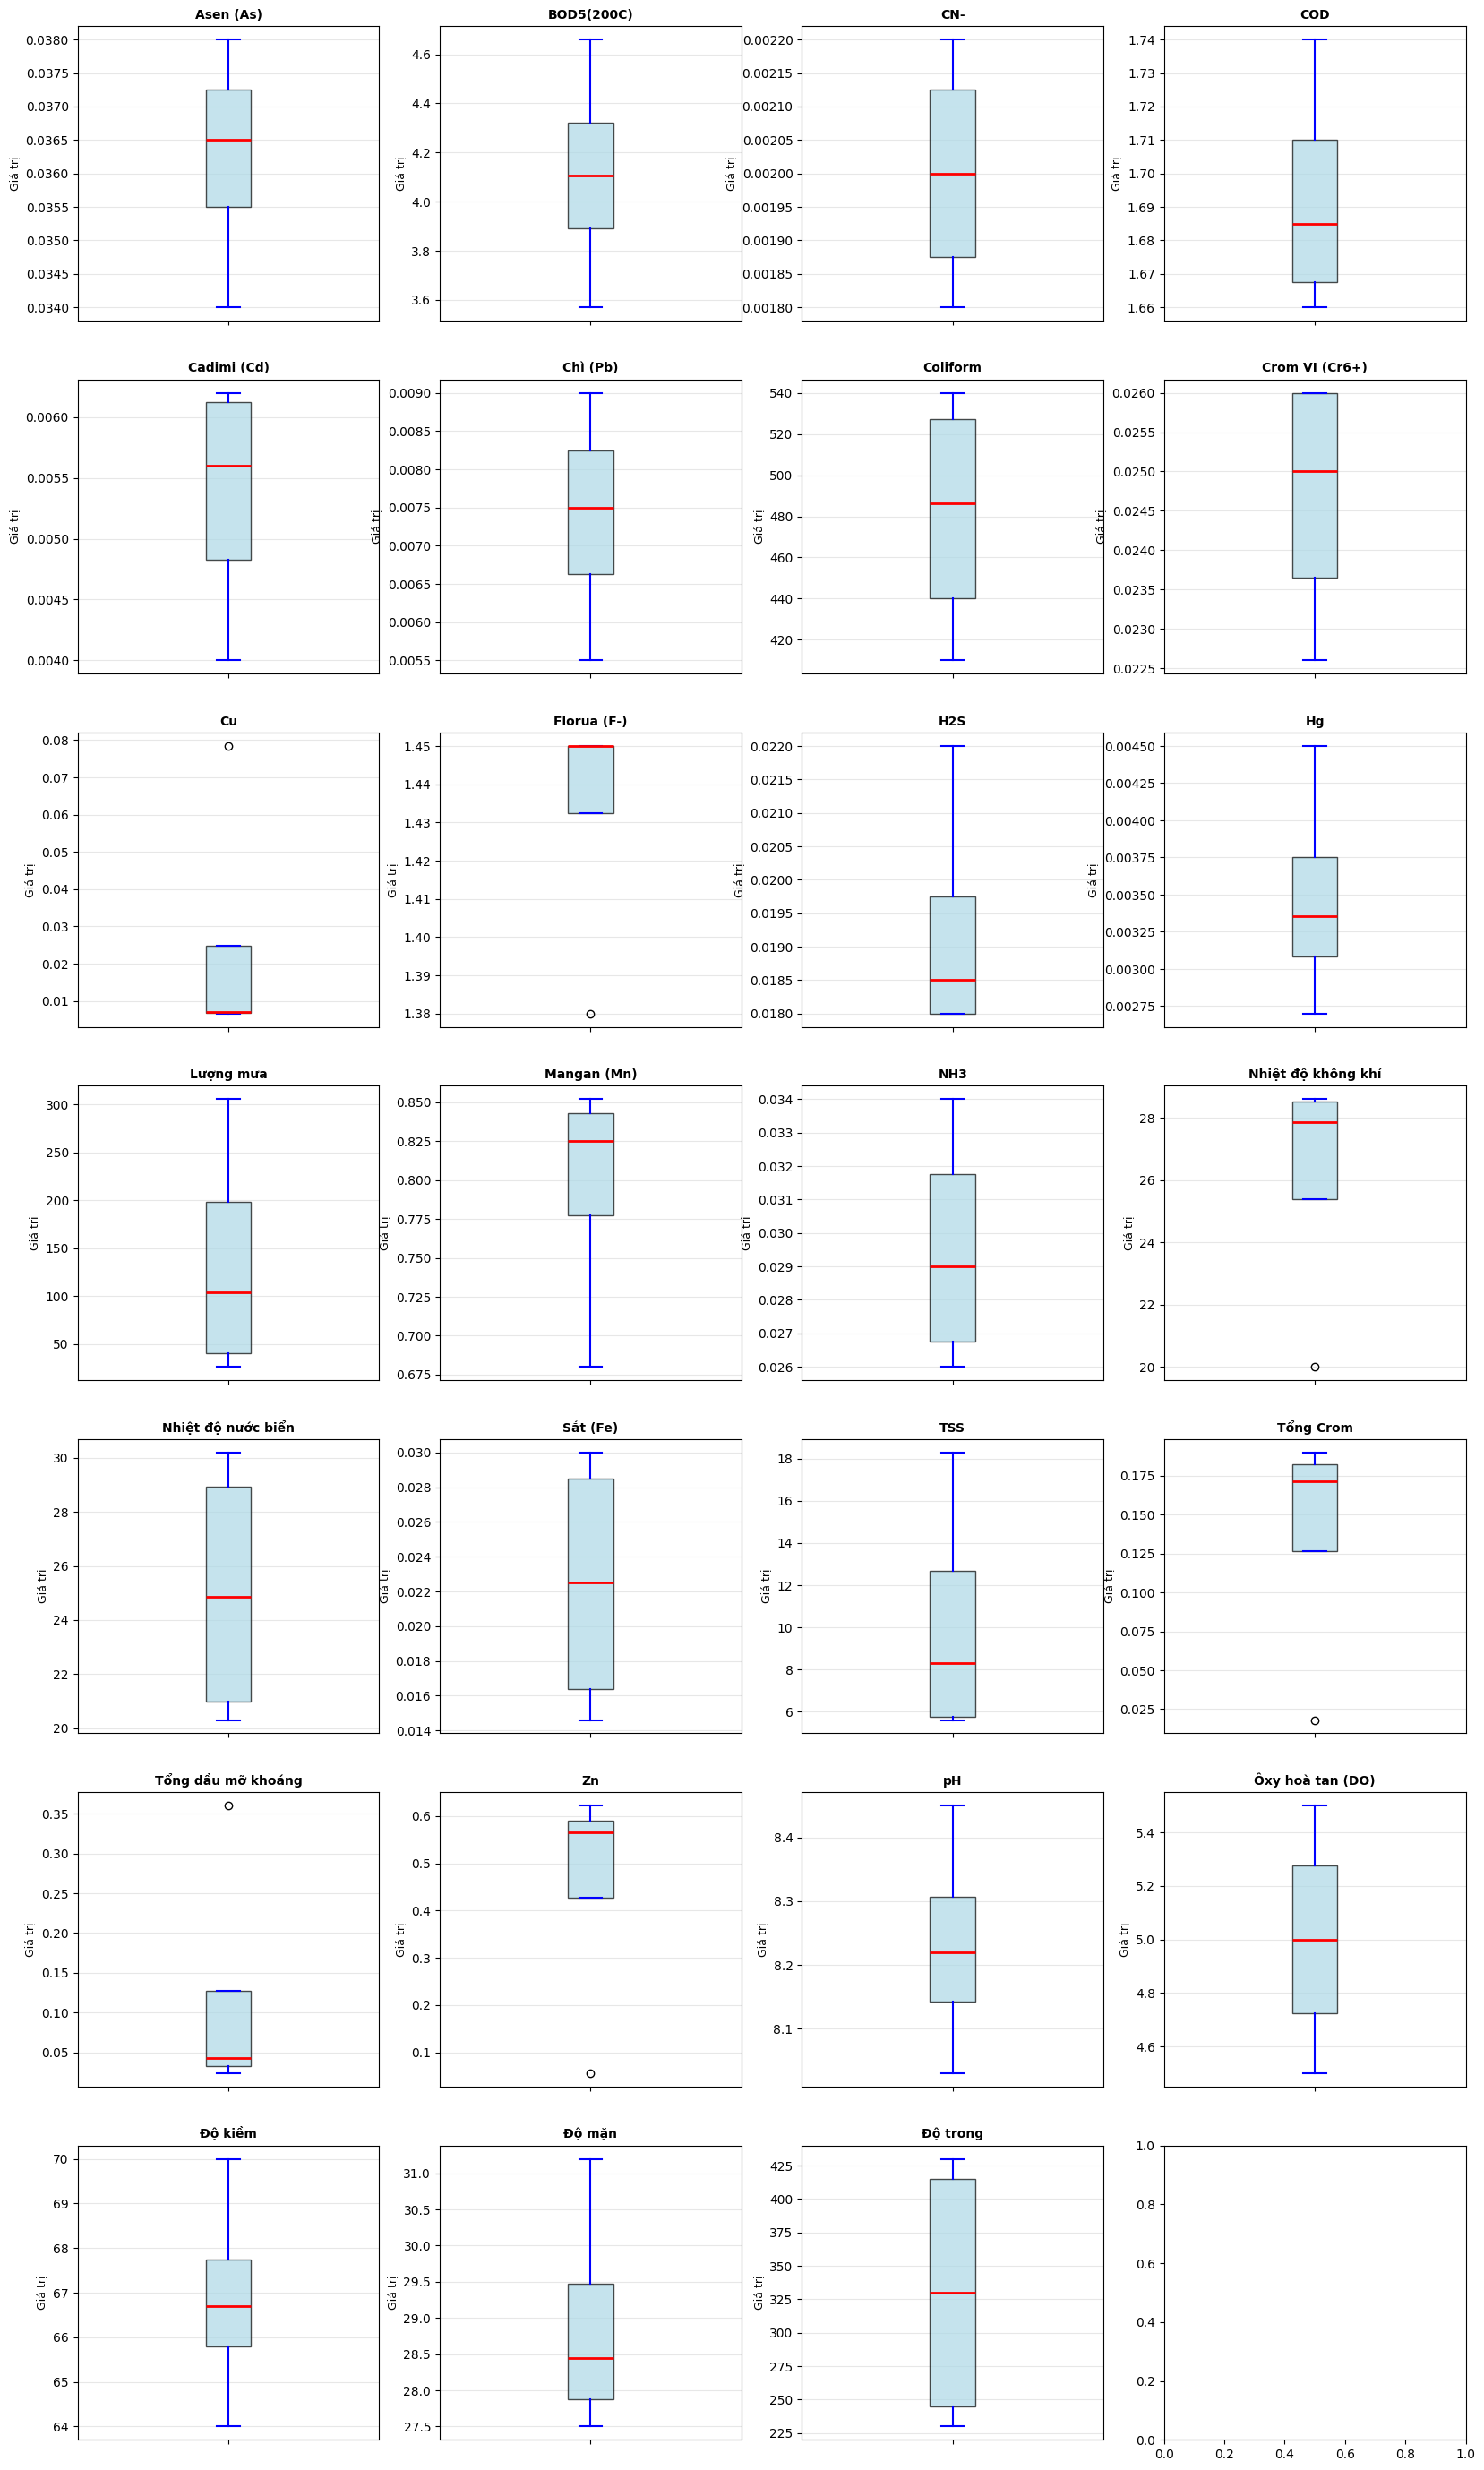

In [14]:
n_cols = len(df_wide.columns)
n_rows = (n_cols + 3) // 4

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(df_wide.columns):
    if idx >= len(axes):
        break
    
    data = df_wide[col]
    
    # Vẽ boxplot
    bp = axes[idx].boxplot([data.values], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5))
    
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Giá trị', fontsize=9)
    axes[idx].set_xticks([1])
    axes[idx].set_xticklabels([''])
    axes[idx].grid(True, alpha=0.3, axis='y')

### BƯỚC 6: Trực quan hóa dữ liệu

**6.1. Phân tích mối tương quan giữa các biến (sau chuẩn hóa)**

  Kích thước ma trận tương quan: (27, 27)


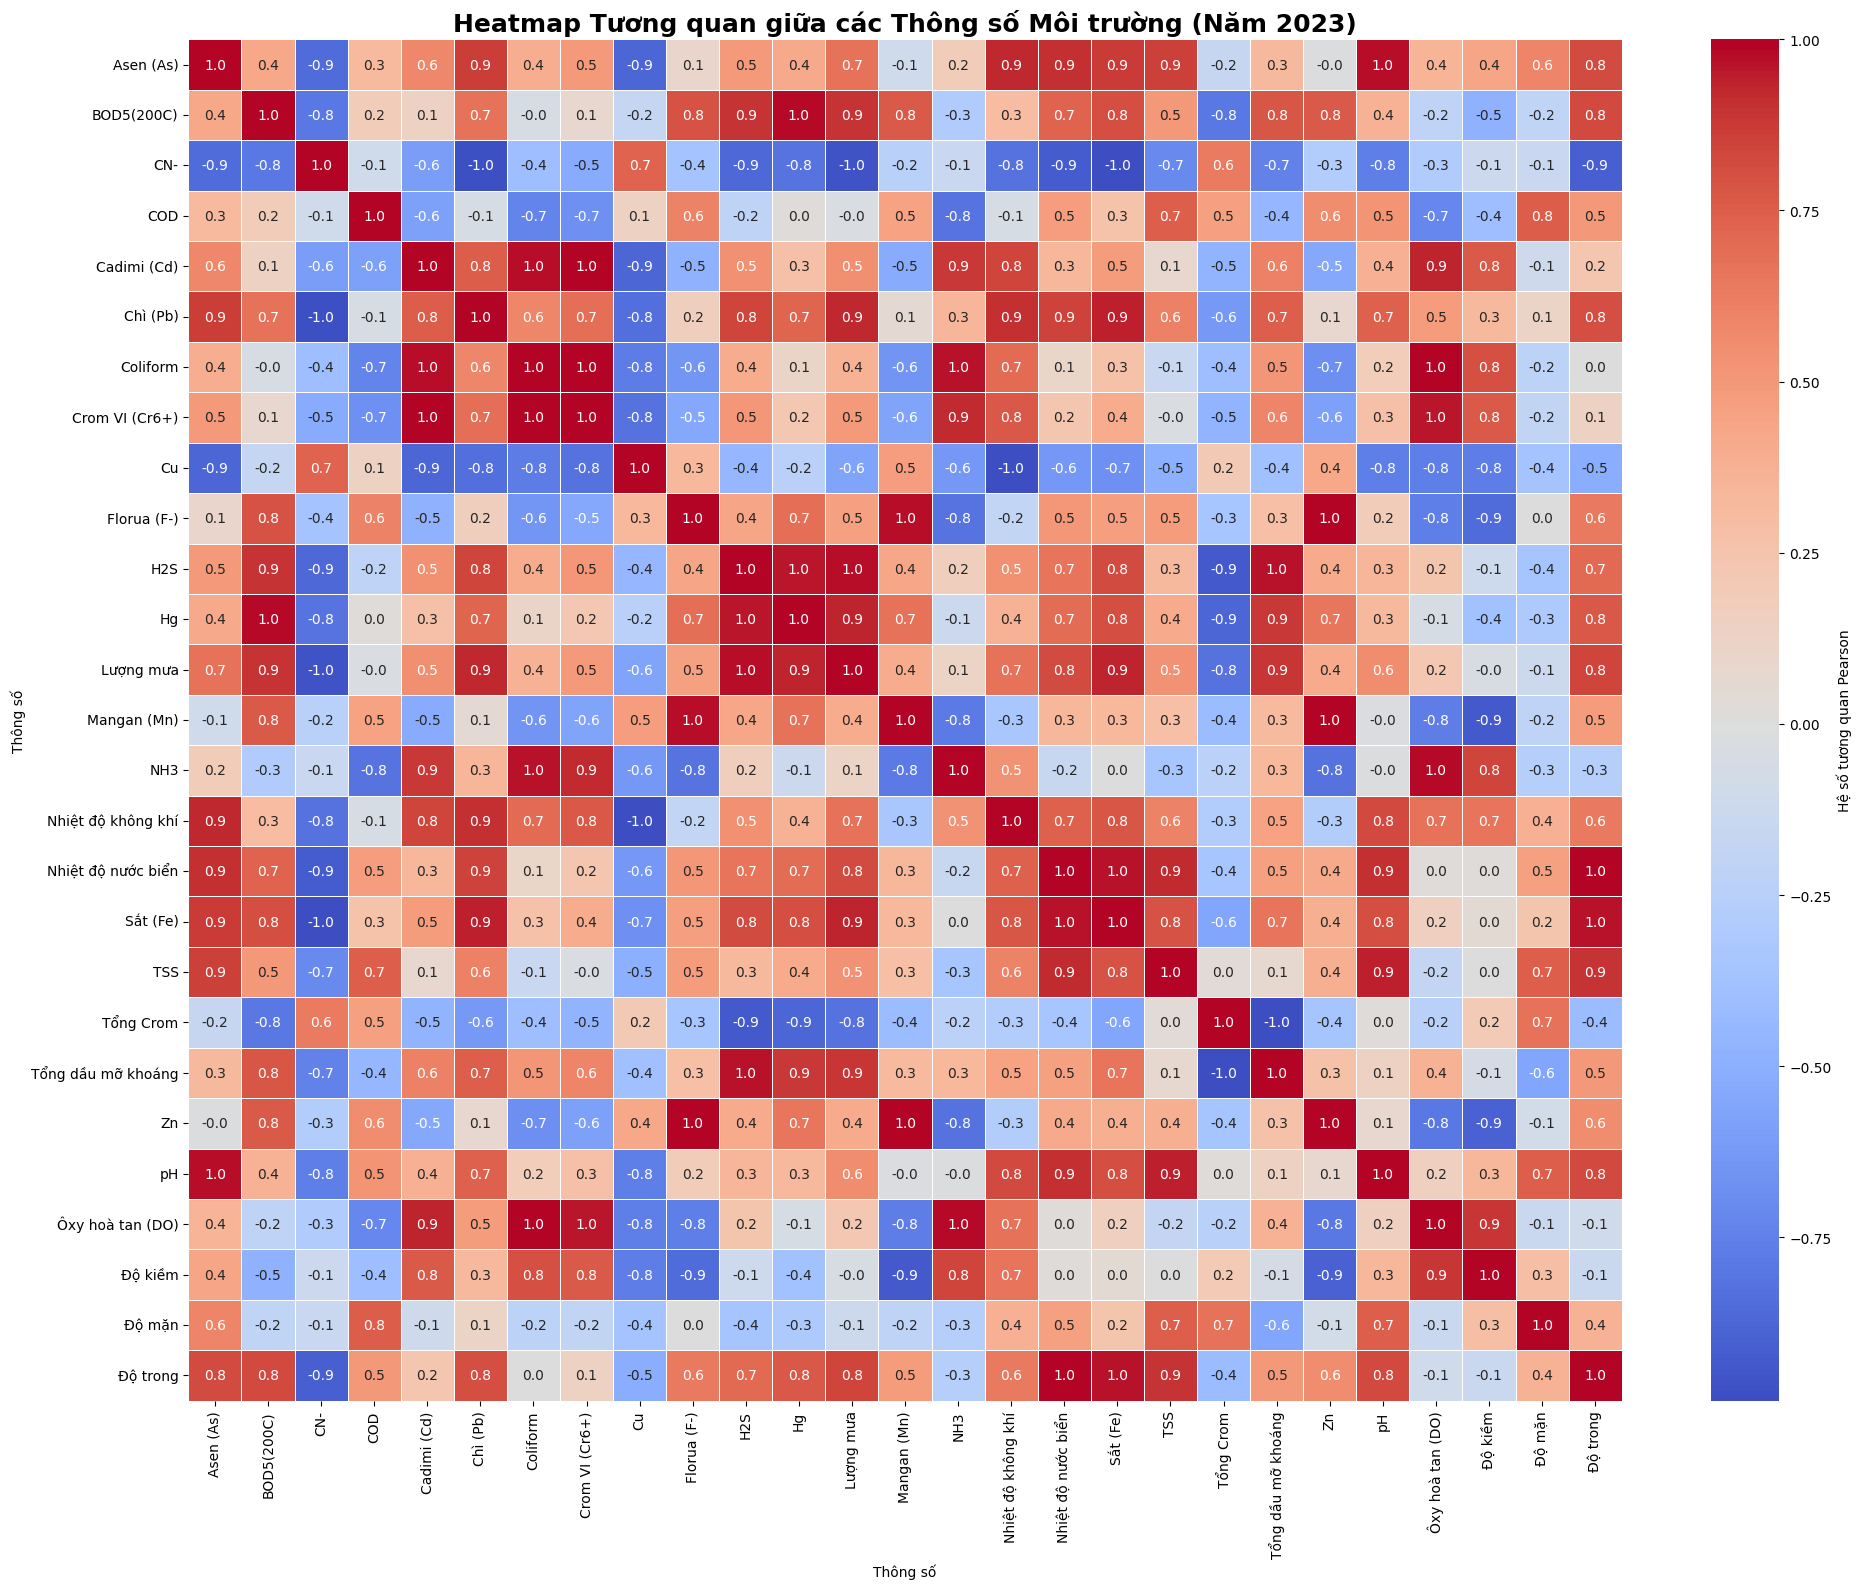

In [16]:
corr_matrix = df_wide.corr(method='pearson')

print(f"  Kích thước ma trận tương quan: {corr_matrix.shape}")

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            center=0, 
            annot=True, # Đặt False vì 27x27 quá rối để hiển thị số
            fmt=".1f",
            linewidths=.5,
            cbar_kws={'label': 'Hệ số tương quan Pearson'})
plt.title('Heatmap Tương quan giữa các Thông số Môi trường (Năm 2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

**6.2. Vẽ biểu đồ nhiệt độ và độ mặn (trước chuẩn hóa)**

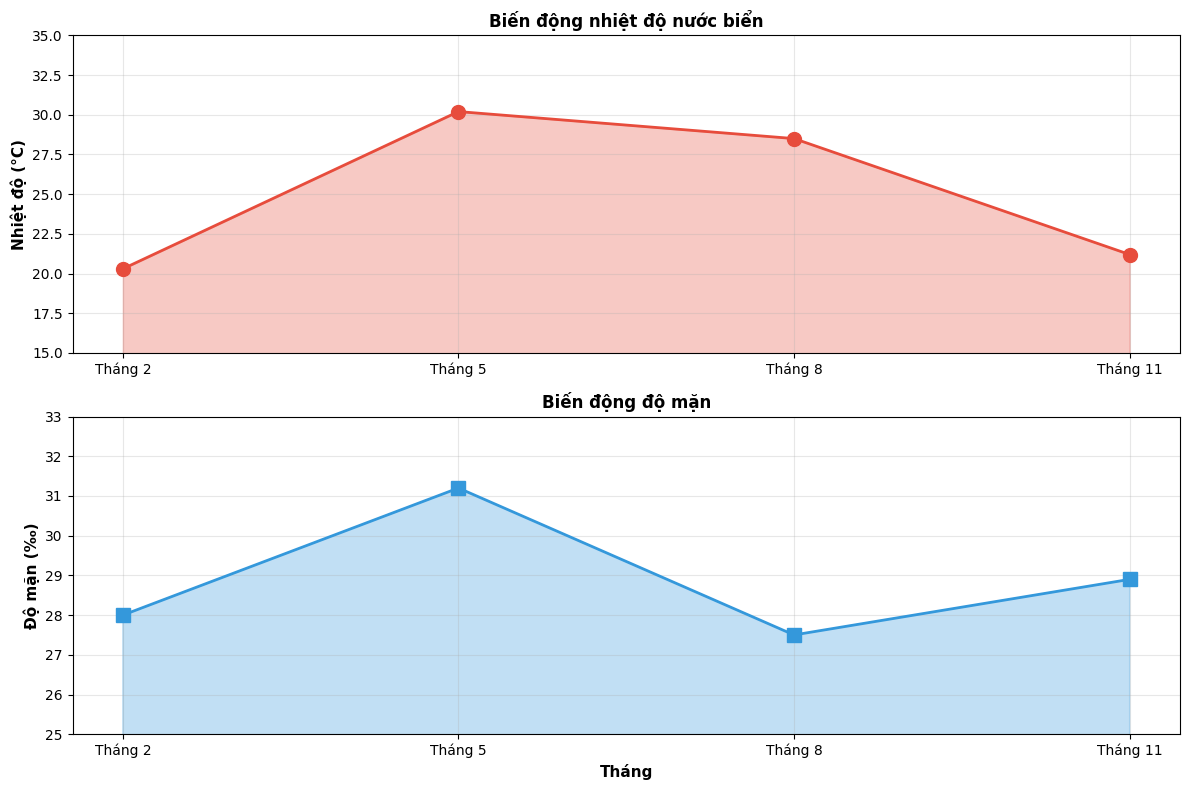

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

month_labels = [f'Tháng {m}' for m in df_wide.index]

# Nhiệt độ nước biển
if 'Nhiệt độ nước biển' in df_wide.columns:
    temp_values = df_wide['Nhiệt độ nước biển'].values
    axes[0].plot(month_labels, temp_values, marker='o', linewidth=2, 
                 markersize=10, color='#e74c3c')
    axes[0].fill_between(range(len(month_labels)), temp_values, alpha=0.3, color='#e74c3c')
    axes[0].set_title('Biến động nhiệt độ nước biển', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Nhiệt độ (°C)', fontsize=11, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim([15, 35])

# Độ mặn
if 'Độ mặn' in df_wide.columns:
    salt_values = df_wide['Độ mặn'].values
    axes[1].plot(month_labels, salt_values, marker='s', linewidth=2, 
                 markersize=10, color='#3498db')
    axes[1].fill_between(range(len(month_labels)), salt_values, alpha=0.3, color='#3498db')
    axes[1].set_title('Biến động độ mặn', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Độ mặn (‰)', fontsize=11, fontweight='bold')
    axes[1].set_xlabel('Tháng', fontsize=11, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([25, 33])

plt.tight_layout()

**6.3. Phân tích kim loại nặng (trước chuẩn hóa)**

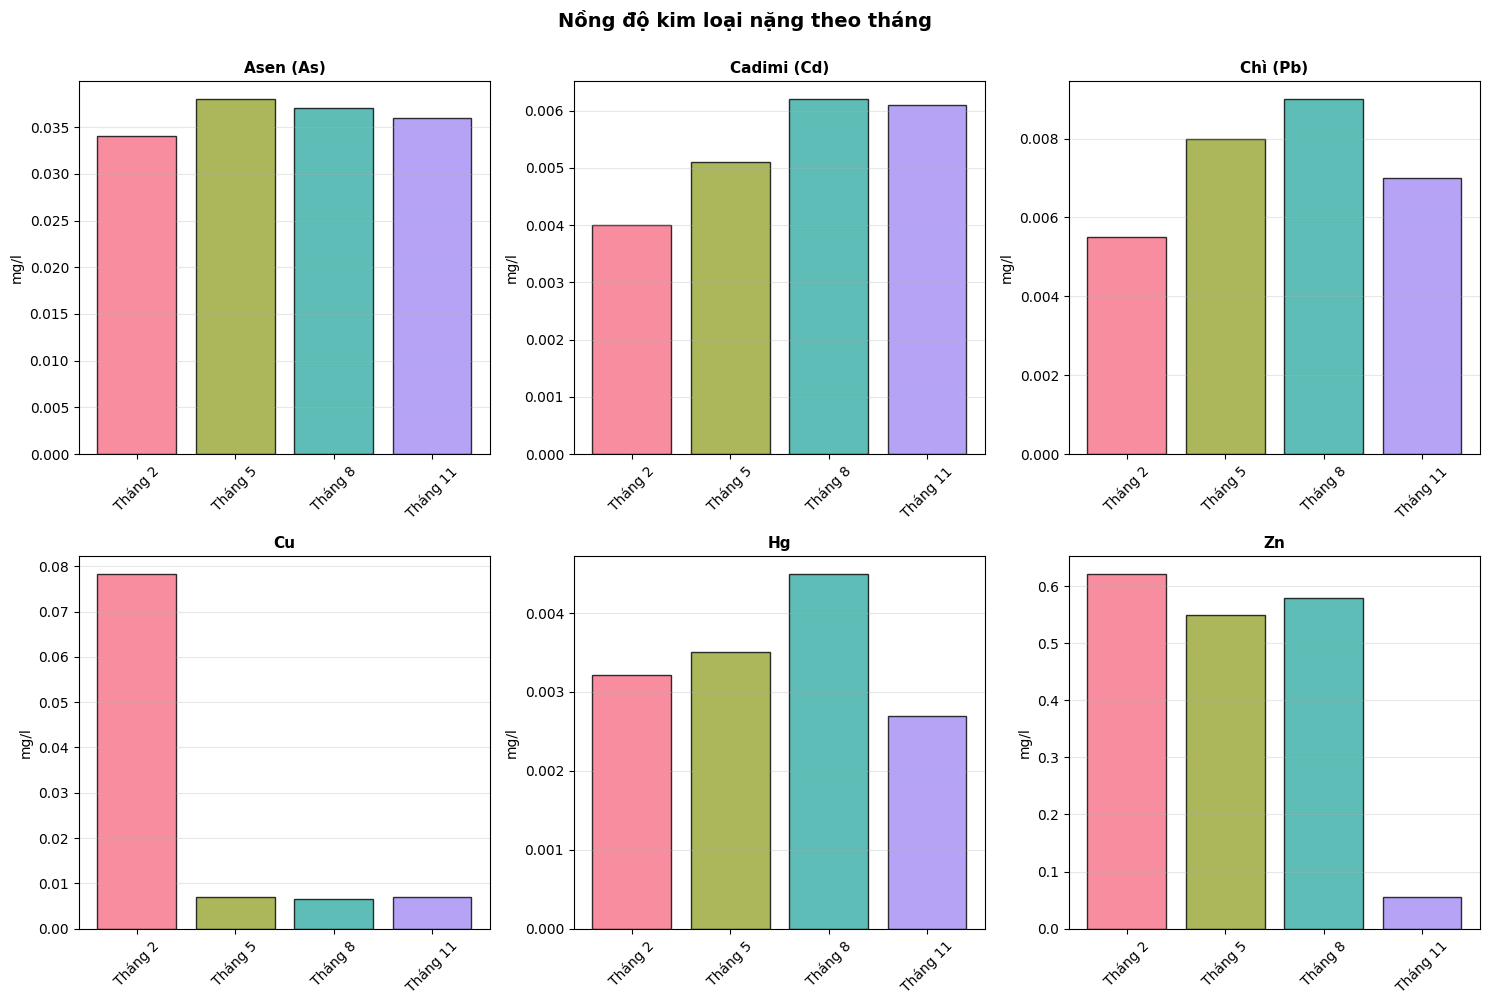

In [18]:
heavy_metals = ['Asen (As)', 'Cadimi (Cd)', 'Chì (Pb)', 'Cu', 'Hg', 'Zn']
available_metals = [m for m in heavy_metals if m in df_wide.columns]

if available_metals:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, metal in enumerate(available_metals):
        if idx < len(axes):
            values = df_wide[metal].values
            axes[idx].bar(month_labels, values, 
                         color=sns.color_palette("husl", 4), 
                         alpha=0.8, edgecolor='black')
            axes[idx].set_title(f'{metal}', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('mg/l', fontsize=10)
            axes[idx].grid(True, alpha=0.3, axis='y')
            axes[idx].tick_params(axis='x', rotation=45)
    
    for idx in range(len(available_metals), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Nồng độ kim loại nặng theo tháng', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()

**6.4. Phân tích chất lượng nước (trước chuẩn hóa)**

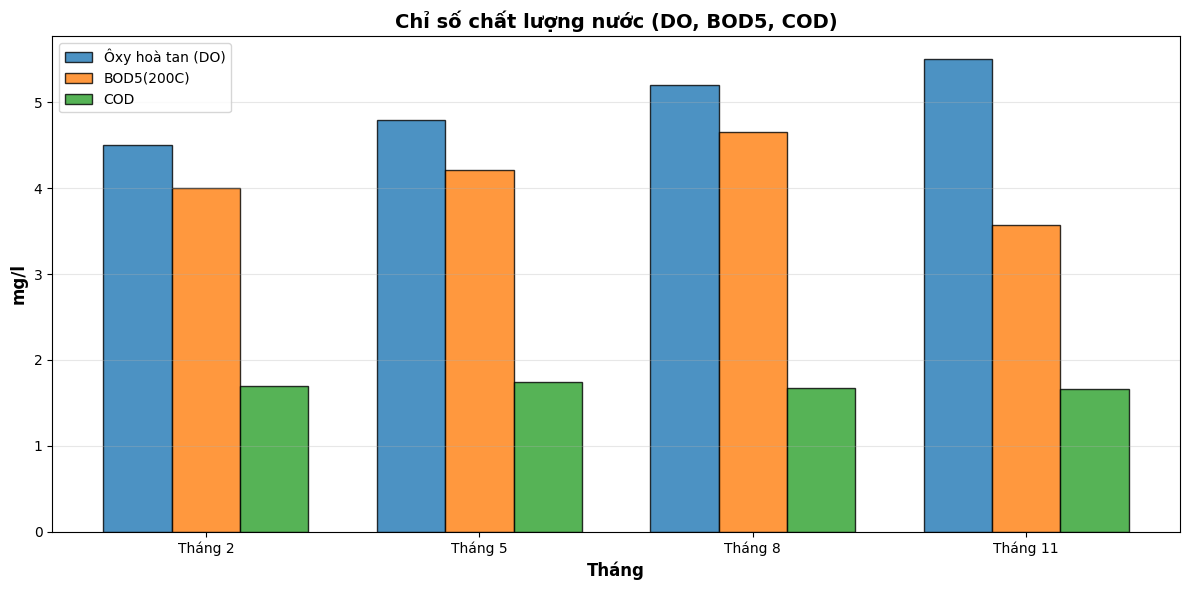

In [19]:
quality_params = ['Ôxy hoà tan (DO)', 'BOD5(200C)', 'COD']
available_quality = [p for p in quality_params if p in df_wide.columns]

if available_quality:
    plt.figure(figsize=(12, 6))
    
    x = np.arange(len(df_wide.index))
    width = 0.25
    
    for idx, param in enumerate(available_quality):
        values = df_wide[param].values
        plt.bar(x + idx*width, values, width, label=param, alpha=0.8, edgecolor='black')
    
    plt.xlabel('Tháng', fontsize=12, fontweight='bold')
    plt.ylabel('mg/l', fontsize=12, fontweight='bold')
    plt.title('Chỉ số chất lượng nước (DO, BOD5, COD)', fontsize=14, fontweight='bold')
    plt.xticks(x + width, month_labels)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()

### BƯỚC 7: Phân tích và kết luận

**7.1. Định nghĩa các giá trị tiêu chuẩn**

In [20]:
# Định nghĩa giá trị cho phép
standards = {
    'Ôxy hoà tan (DO)': {'limit': 5, 'type': 'min', 'unit': 'mg/l'},
    'Nhiệt độ nước biển': {'limit': [20, 28], 'type': 'range', 'unit': '°C'},
    'pH': {'limit': [7.5, 8.5], 'type': 'range', 'unit': ''},
    'Độ mặn': {'limit': [20, 25], 'type': 'range', 'unit': '‰'},
    'Độ kiềm': {'limit': [60, 180], 'type': 'range', 'unit': 'mg/l'},
    'Độ trong': {'limit': 20, 'type': 'min', 'unit': 'cm'},
    'NH3': {'limit': 0.3, 'type': 'max', 'unit': 'mg/l'},
    'H2S': {'limit': 0.05, 'type': 'max', 'unit': 'mg/l'},
    'BOD5(200C)': {'limit': 50, 'type': 'max', 'unit': 'mg/l'},
    'COD': {'limit': 150, 'type': 'max', 'unit': 'mg/l'},
    'Coliform': {'limit': 5000, 'type': 'max', 'unit': 'MPN/100ml'},
    'TSS': {'limit': 50, 'type': 'max', 'unit': 'mg/l'},
    'CN-': {'limit': 0.1, 'type': 'max', 'unit': 'mg/l'},
    'Asen (As)': {'limit': 0.02, 'type': 'max', 'unit': 'mg/l'},
    'Cadimi (Cd)': {'limit': 0.005, 'type': 'max', 'unit': 'mg/l'},
    'Chì (Pb)': {'limit': 0.05, 'type': 'max', 'unit': 'mg/l'},
    'Cu': {'limit': 0.2, 'type': 'max', 'unit': 'mg/l'},
    'Hg': {'limit': 0.001, 'type': 'max', 'unit': 'mg/l'},
    'Zn': {'limit': 0.5, 'type': 'max', 'unit': 'mg/l'},
    'Florua (F-)': {'limit': 1.5, 'type': 'max', 'unit': 'mg/l'},
    'Sắt (Fe)': {'limit': 0.5, 'type': 'max', 'unit': 'mg/l'},
    'Crom VI (Cr6+)': {'limit': 0.05, 'type': 'max', 'unit': 'mg/l'},
    'Tổng Crom': {'limit': 0.1, 'type': 'max', 'unit': 'mg/l'},
    'Mangan (Mn)': {'limit': 1.0, 'type': 'max', 'unit': 'mg/l'},
    'Tổng dầu mỡ khoáng': {'limit': 0.5, 'type': 'max', 'unit': 'mg/l'}
}

results = []

for param_name, standard in standards.items():
    if param_name not in df_wide.columns:
        continue
    
    data = df_wide[param_name]
    avg_value = data.mean()
    min_value = data.min()
    max_value = data.max()
    
    # Kiểm tra đạt chuẩn
    status = "✓ Đạt"
    detail = ""
    
    if standard['type'] == 'min':
        if min_value < standard['limit']:
            status = "⚠ KHÔNG ĐẠT"
            detail = f"Thấp hơn {standard['limit']} {standard['unit']}"
    elif standard['type'] == 'max':
        if max_value > standard['limit']:
            status = "⚠ KHÔNG ĐẠT"
            exceed_rate = (max_value / standard['limit'] - 1) * 100
            detail = f"Vượt {exceed_rate:.1f}%"
    elif standard['type'] == 'range':
        if min_value < standard['limit'][0] or max_value > standard['limit'][1]:
            status = "⚠ KHÔNG ĐẠT"
            if min_value < standard['limit'][0]:
                detail = f"Thấp hơn ngưỡng dưới"
            if max_value > standard['limit'][1]:
                detail = f"Vượt ngưỡng trên"
    
    results.append({
        'Thông số': param_name,
        'Giá trị TB': f"{avg_value:.4f}",
        'Min': f"{min_value:.4f}",
        'Max': f"{max_value:.4f}",
        'Giới hạn': str(standard['limit']),
        'Đơn vị': standard['unit'],
        'Trạng thái': status,
        'Ghi chú': detail
    })

**7.2. Kiểm tra các giá trị trong bảng với giá trị tiêu chuẩn**

In [21]:
df_results = pd.DataFrame(results)
print("\n" + df_results.to_string(index=False))


          Thông số Giá trị TB      Min      Max   Giới hạn    Đơn vị  Trạng thái          Ghi chú
  Ôxy hoà tan (DO)     5.0000   4.5000   5.5000          5      mg/l ⚠ KHÔNG ĐẠT  Thấp hơn 5 mg/l
Nhiệt độ nước biển    25.0500  20.3000  30.2000   [20, 28]        °C ⚠ KHÔNG ĐẠT Vượt ngưỡng trên
                pH     8.2300   8.0300   8.4500 [7.5, 8.5]                 ✓ Đạt                 
            Độ mặn    28.9000  27.5000  31.2000   [20, 25]         ‰ ⚠ KHÔNG ĐẠT Vượt ngưỡng trên
           Độ kiềm    66.8500  64.0000  70.0000  [60, 180]      mg/l       ✓ Đạt                 
          Độ trong   330.0000 230.0000 430.0000         20        cm       ✓ Đạt                 
               NH3     0.0295   0.0260   0.0340        0.3      mg/l       ✓ Đạt                 
               H2S     0.0192   0.0180   0.0220       0.05      mg/l       ✓ Đạt                 
        BOD5(200C)     4.1100   3.5700   4.6600         50      mg/l       ✓ Đạt                 
               COD 

**7.3. Thống kê số lượng thông số đạt và không đạt tiêu chuẩn**

In [22]:
total_params = len(results)
passed_params = sum(1 for r in results if r['Trạng thái'] == "✓ Đạt")
failed_params = total_params - passed_params

print("\n" + "="*80)
print("THỐNG KÊ TỔNG QUAN:")
print("="*80)
print(f"Tổng số thông số được đánh giá: {total_params}")
print(f"Số thông số ĐẠT tiêu chuẩn: {passed_params} ({passed_params/total_params*100:.1f}%)")
print(f"Số thông số KHÔNG ĐẠT: {failed_params} ({failed_params/total_params*100:.1f}%)")


THỐNG KÊ TỔNG QUAN:
Tổng số thông số được đánh giá: 25
Số thông số ĐẠT tiêu chuẩn: 17 (68.0%)
Số thông số KHÔNG ĐẠT: 8 (32.0%)


**7.4. Đánh giá chất lượng tổng quan biển Cát Bà**

In [ ]:
if passed_params/total_params >= 0.8:
    print(f"   Chất lượng nước biển Cát Bà năm 2023 ở mức TỐT với {passed_params/total_params*100:.1f}% thông số đạt chuẩn.")
elif passed_params/total_params >= 0.6:
    print(f"   Chất lượng nước biển Cát Bà năm 2023 ở mức TRUNG BÌNH với {passed_params/total_params*100:.1f}% thông số đạt chuẩn.")
else:
    print(f"   Chất lượng nước biển Cát Bà năm 2023 CẦN CẢI THIỆN với chỉ {passed_params/total_params*100:.1f}% thông số đạt chuẩn.")

   Chất lượng nước biển Cát Bà năm 2023 ở mức TRUNG BÌNH với 68.0% thông số đạt chuẩn.
